# Sarvesh Kumar 21BAI1483 (VIT Chennai)

# Import the Libraries

In [272]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [273]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [274]:
df.shape

(891, 12)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [276]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Checking for Null Values

In [277]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [278]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Imputing the null values

In [279]:
age_median = df['Age'].median()
age_median

28.0

In [280]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [281]:
cabin_mode = df['Cabin'].mode()
cabin_mode

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [282]:
cabin_mode[0][0:3]

'B96'

In [283]:
df['Cabin'].fillna(value = cabin_mode[0][0:3], inplace=True)

In [284]:
df.dropna(subset=['Embarked'], inplace=True)

In [285]:
df.shape

(889, 12)

In [286]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Visualization

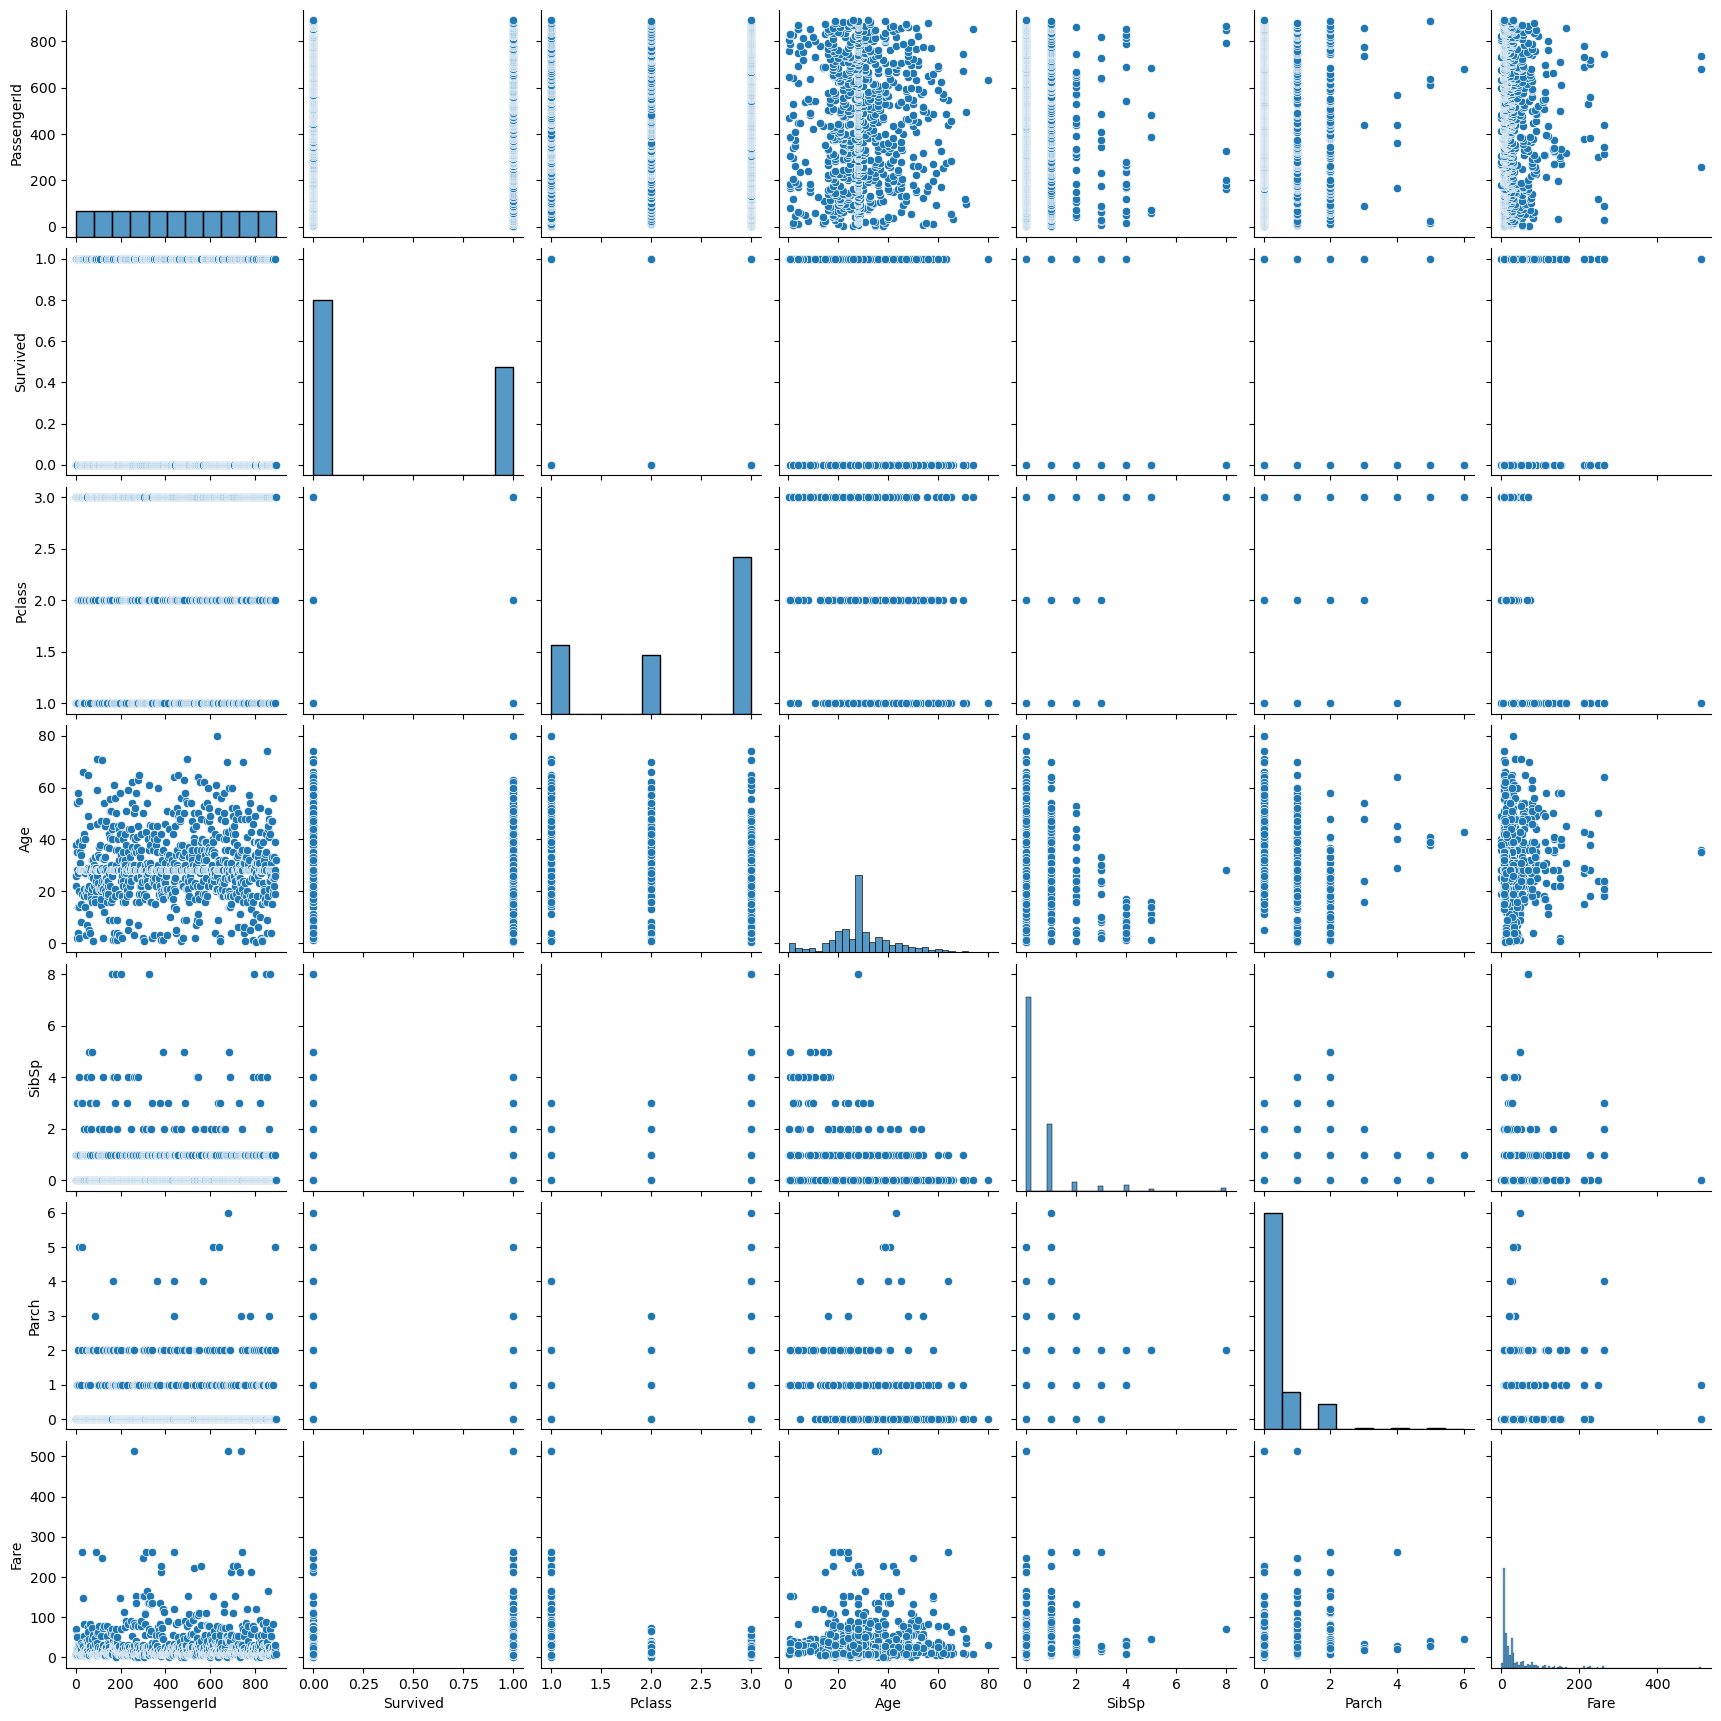

In [287]:
sns.pairplot(data=df)

In [288]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


<Axes: >

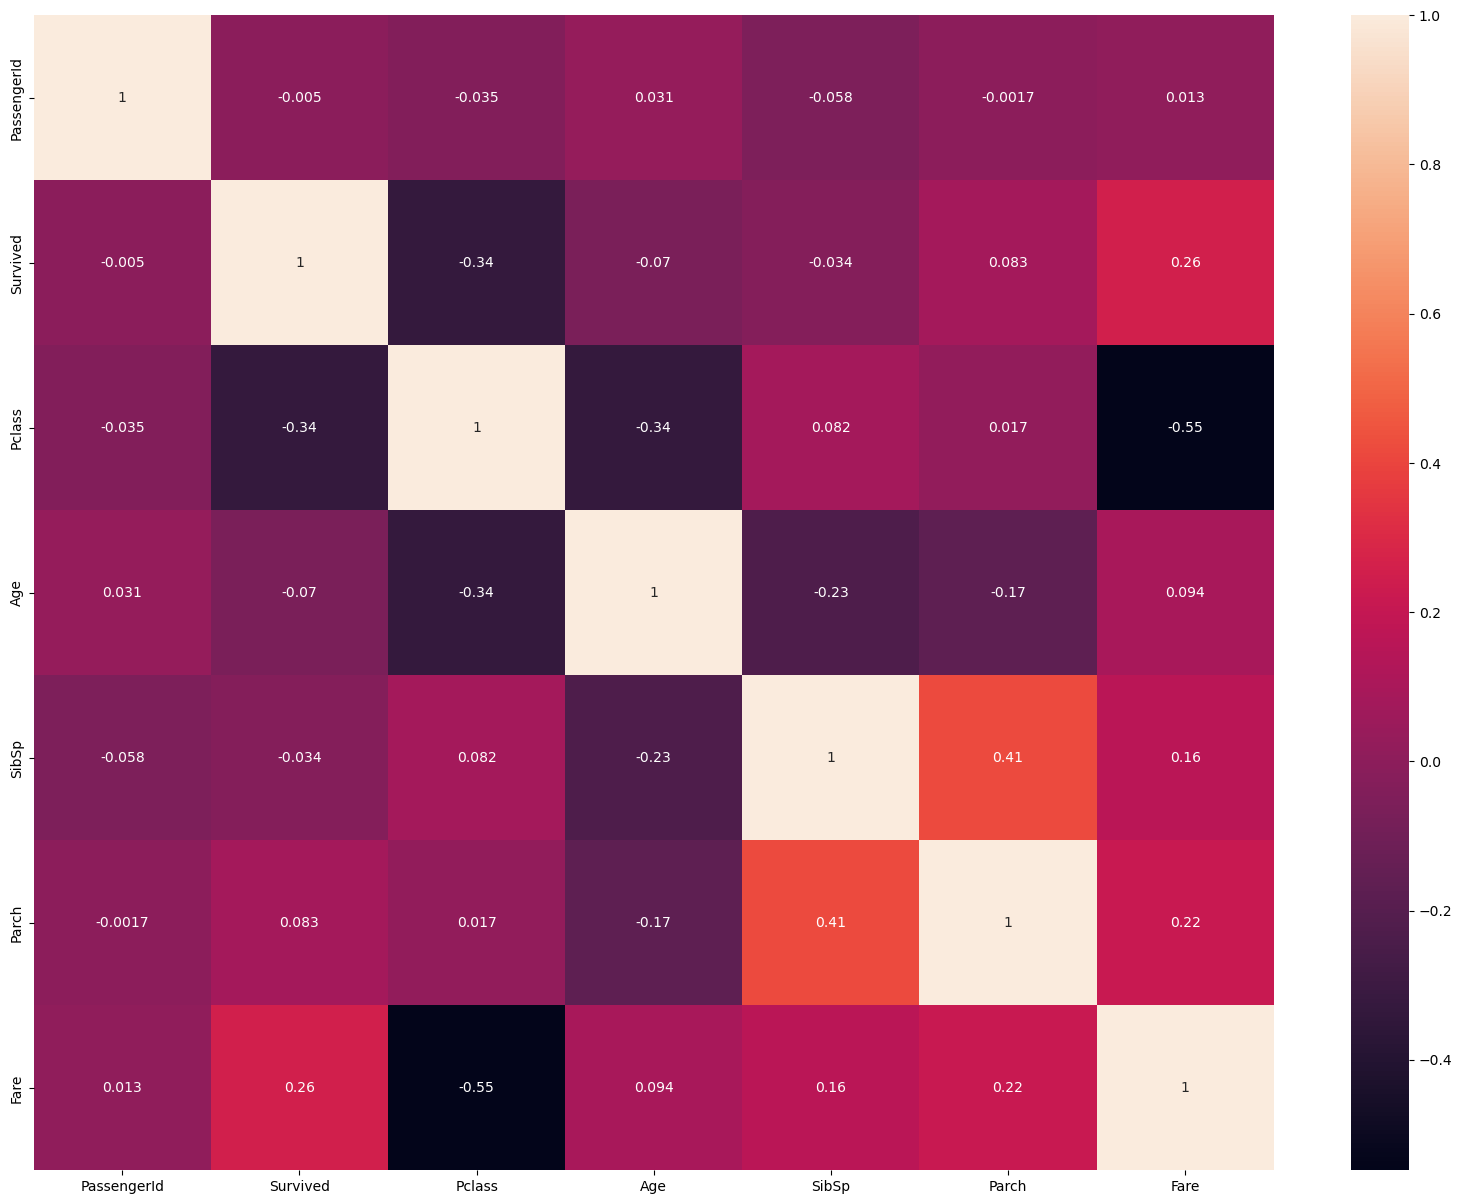

In [289]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [290]:
df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

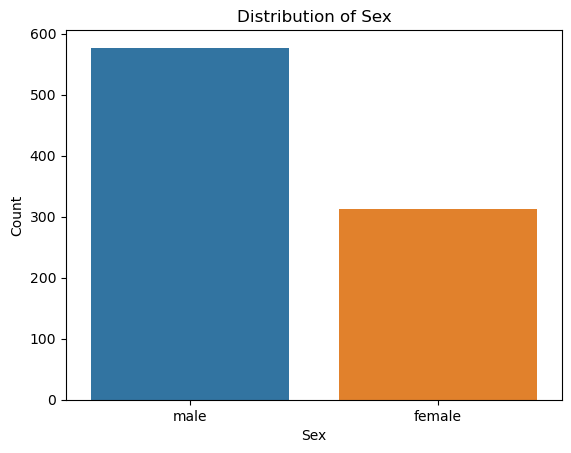

In [291]:
sns.countplot(data=df, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

In [292]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

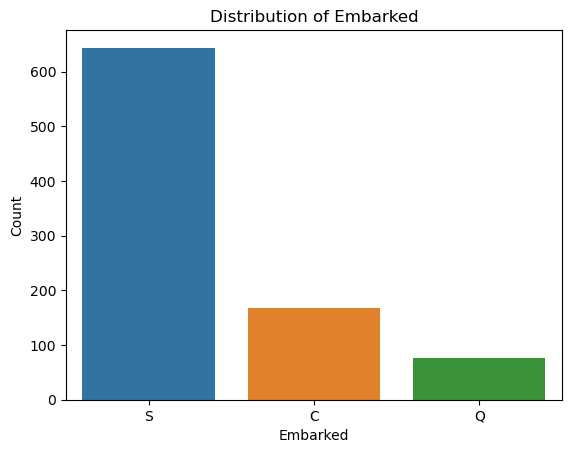

In [293]:
sns.countplot(data=df, x='Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')
plt.show()

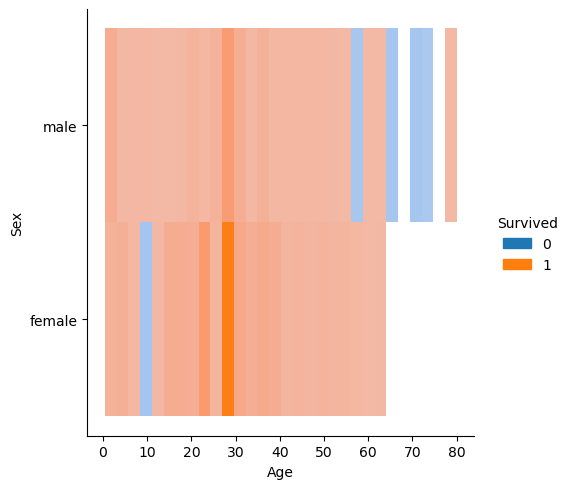

In [294]:
sns.displot(data=df,x='Age',y='Sex',hue='Survived')

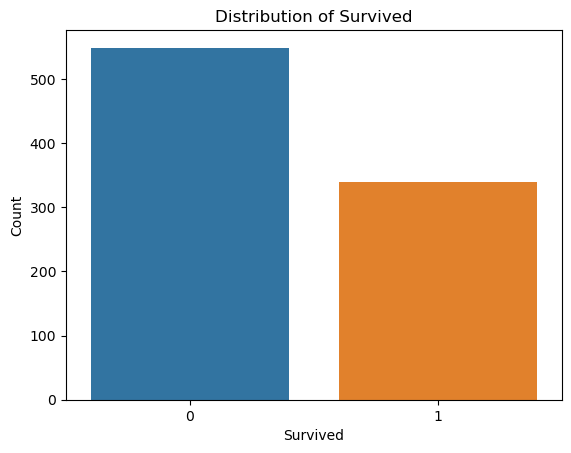

In [295]:
sns.countplot(data=df, x='Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived')
plt.show()

# Drop Unwanted Columns

In [296]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96,S


In [297]:
df['Cabin'].value_counts()

B96            687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [298]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [299]:
df = df.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis = 1)

In [300]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Outlier Detection

<Axes: >

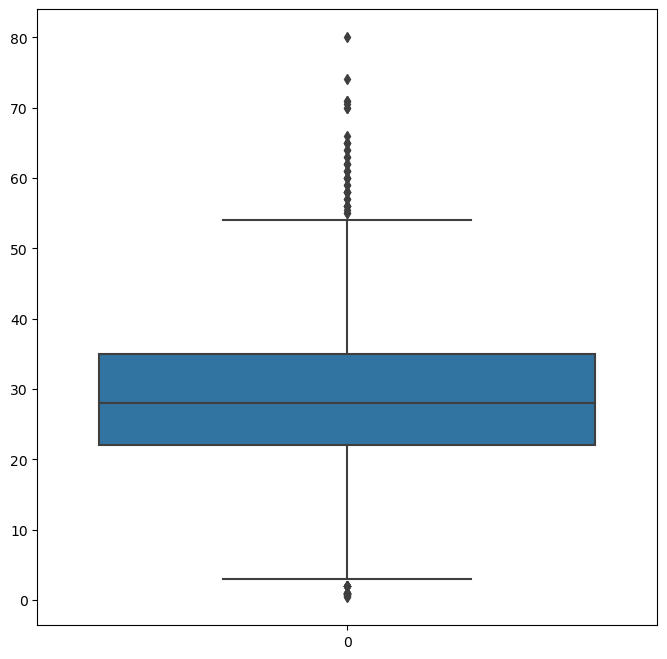

In [301]:
plt.figure(figsize=(8,8))
sns.boxplot(df['Age'])

<Axes: >

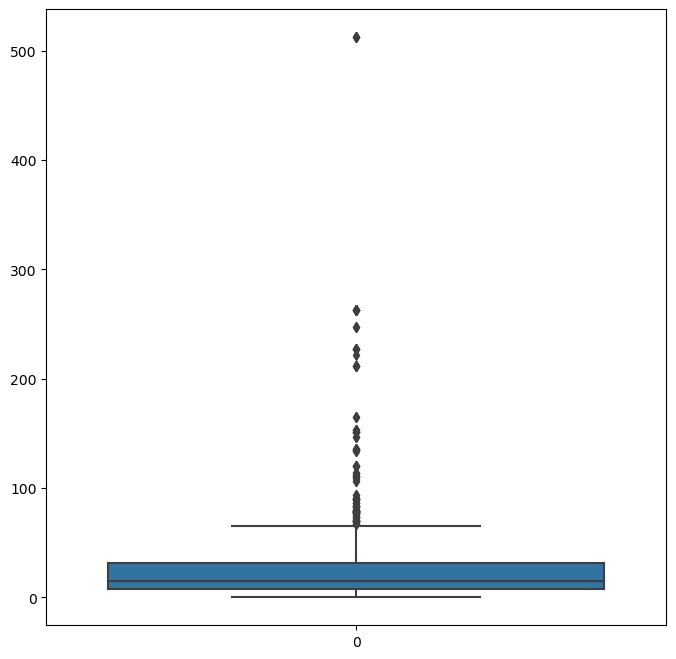

In [302]:
plt.figure(figsize=(8,8))
sns.boxplot(df['Fare'])

In [303]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2.00,3,1,21.0750,S
11,1,1,female,58.00,0,0,26.5500,S
15,1,2,female,55.00,0,0,16.0000,S
16,0,3,male,2.00,4,1,29.1250,Q
33,0,2,male,66.00,0,0,10.5000,S
...,...,...,...,...,...,...,...,...
824,0,3,male,2.00,4,1,39.6875,S
827,1,2,male,1.00,0,2,37.0042,C
831,1,2,male,0.83,1,1,18.7500,S
851,0,3,male,74.00,0,0,7.7750,S


In [304]:
median_age = df['Age'].median()
df['Age'] = np.where((df['Age'] < lower_bound) | (df['Age'] > upper_bound), median_age, df['Age'])

<Axes: >

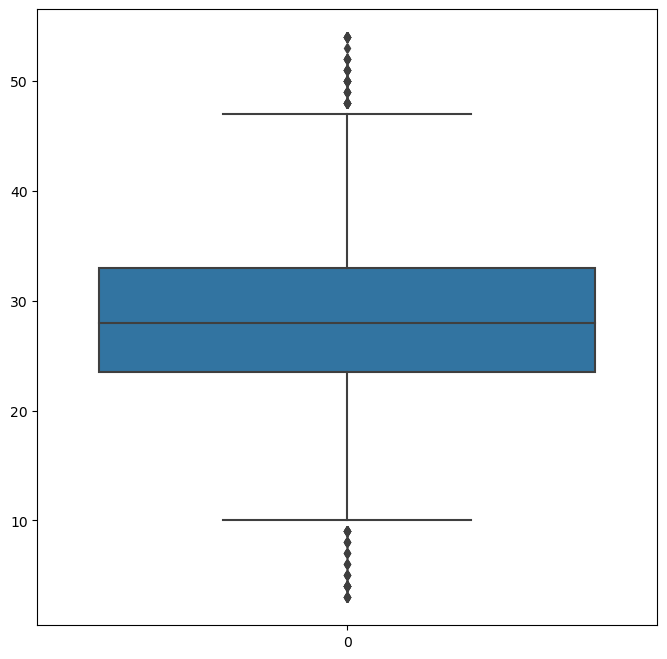

In [305]:
plt.figure(figsize=(8,8))
sns.boxplot(df['Age'])

In [306]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
27,0,1,male,19.0,3,2,263.0000,S
31,1,1,female,28.0,1,0,146.5208,C
34,0,1,male,28.0,1,0,82.1708,C
52,1,1,female,49.0,1,0,76.7292,C
...,...,...,...,...,...,...,...,...
846,0,3,male,28.0,8,2,69.5500,S
849,1,1,female,28.0,1,0,89.1042,C
856,1,1,female,45.0,1,1,164.8667,S
863,0,3,female,28.0,8,2,69.5500,S


In [307]:
median_age = df['Fare'].median()
df['Fare'] = np.where((df['Fare'] < lower_bound) | (df['Fare'] > upper_bound), median_age, df['Age'])

<Axes: >

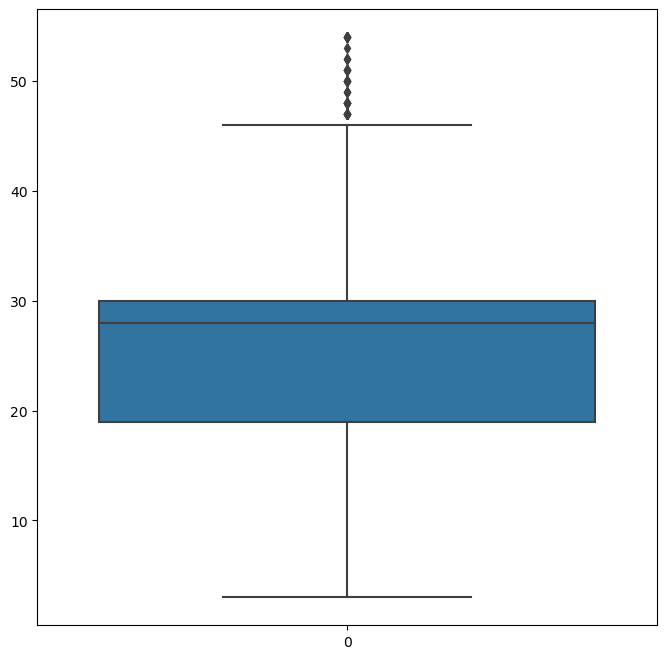

In [308]:
plt.figure(figsize=(8,8))
sns.boxplot(df['Fare'])

# Splitting Dependent and Independent variables

In [309]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [310]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,22.0000,S
1,1,female,38.0,1,0,14.4542,C
2,3,female,26.0,0,0,26.0000,S
3,1,female,35.0,1,0,35.0000,S
4,3,male,35.0,0,0,35.0000,S


In [311]:
type(X)

pandas.core.frame.DataFrame

In [312]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [313]:
type(y)

pandas.core.series.Series

# Encoding

In [314]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [315]:
X['Sex'] = encoder.fit_transform(X['Sex'])

In [316]:
X['Sex'].unique()

array([1, 0])

In [317]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,22.0000,S
1,1,0,38.0,1,0,14.4542,C
2,3,0,26.0,0,0,26.0000,S
3,1,0,35.0,1,0,35.0000,S
4,3,1,35.0,0,0,35.0000,S


In [318]:
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)

In [319]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,22.0000,0,1
1,1,0,38.0,1,0,14.4542,0,0
2,3,0,26.0,0,0,26.0000,0,1
3,1,0,35.0,1,0,35.0000,0,1
4,3,1,35.0,0,0,35.0000,0,1


# Feature Scaling

In [320]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.82520863,  0.73534203, -0.66029425, ..., -0.42940679,
        -0.30794088,  0.61679395],
       [-1.57221121, -1.35991138,  0.97338559, ..., -1.17609386,
        -0.30794088, -1.62128697],
       [ 0.82520863, -1.35991138, -0.25187429, ..., -0.0335908 ,
        -0.30794088,  0.61679395],
       ...,
       [ 0.82520863, -1.35991138, -0.04766431, ...,  0.1643172 ,
        -0.30794088,  0.61679395],
       [-1.57221121,  0.73534203, -0.25187429, ..., -0.0335908 ,
        -0.30794088, -1.62128697],
       [ 0.82520863,  0.73534203,  0.36075565, ...,  0.56013319,
         3.24737656, -1.62128697]])

In [321]:
X_Scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_Scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.825209,0.735342,-0.660294,0.431350,-0.474326,-0.429407,-0.307941,0.616794
1,-1.572211,-1.359911,0.973386,0.431350,-0.474326,-1.176094,-0.307941,-1.621287
2,0.825209,-1.359911,-0.251874,-0.475199,-0.474326,-0.033591,-0.307941,0.616794
3,-1.572211,-1.359911,0.667071,0.431350,-0.474326,0.856995,-0.307941,0.616794
4,0.825209,0.735342,0.667071,-0.475199,-0.474326,0.856995,-0.307941,0.616794


# Splitting Data into Train and Test

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [323]:
print('X_train ' + str(X_train.shape))
print('X_test ' + str(X_test.shape))
print('y_train ' + str(y_train.shape))
print('y_test ' + str(y_test.shape))

X_train (711, 8)
X_test (178, 8)
y_train (711,)
y_test (178,)


In [324]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
363,0.825209,0.735342,-0.047664,0.431350,-0.474326,0.164317,3.247377,-1.621287
255,-1.572211,-1.359911,-0.047664,-0.475199,-0.474326,-1.176094,-0.307941,-1.621287
476,0.825209,0.735342,0.054441,0.431350,-0.474326,0.263271,-0.307941,0.616794
271,-0.373501,-1.359911,1.279701,-0.475199,0.765897,1.450719,-0.307941,0.616794
553,0.825209,-1.359911,-0.660294,-0.475199,-0.474326,-0.429407,-0.307941,0.616794


In [325]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
14,0.825209,-1.359911,-1.477134,-0.475199,-0.474326,-1.221039,-0.307941,0.616794
158,0.825209,0.735342,-0.047664,6.777195,2.006119,-1.176094,-0.307941,0.616794
762,-1.572211,-1.359911,0.769176,0.431350,2.006119,-1.176094,-0.307941,0.616794
740,-1.572211,0.735342,0.769176,0.431350,-0.474326,-1.176094,-0.307941,0.616794
482,0.825209,-1.359911,-0.047664,-0.475199,-0.474326,0.164317,-0.307941,0.616794
